Tarea: Realizar un análisis aglomerativo para formar grupos a partir de un conjunto de datos cuyas distancias entre puntos están en la siguiente matriz de distancias:

$ \begin{array}{c|cccccc}
   & A & B & C & D & E & F \\
\hline
A & 0 & 6 & 5 & 4 & 6 & 9 \\
B & 6 & 0 & 3 & 2 & 3 & 8 \\
C & 5 & 3 & 0 & 5 & 7 & 4 \\
D & 4 & 2 & 5 & 0 & 3 & 1 \\
E & 6 & 3 & 7 & 3 & 0 & 5 \\
F & 9 & 8 & 4 & 1 & 5 & 0 \\
\end{array} $

1. Obtener el algoritmo con

	a) Vecino más cercano (single linkage)

	b) Vecino más lejano (complete linkage)

	c) Promedio (average linkage)


2. Obtener el dendrograma para cada uno de los métodos anteriores y decidir cuántos grupos formar.

In [78]:
# Se guarda la matriz de distancias en una matriz
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

distancias = np.array([[0, 6, 5, 4, 6, 9],
					   [6, 0, 3, 2, 3, 8],
					   [5, 3, 0, 5, 7, 4],
					   [4, 2, 5, 0, 3, 1],
					   [6, 3, 7, 3, 0, 5],
					   [9, 8, 4, 1, 5, 0]])

# Creamos un vector con los nombres de los clusters
clusters = ['A', 'B', 'C', 'D', 'E', 'F']

In [82]:
# Primer iteración
# Buscamos la distancia mínima en la matriz
min_dist = np.inf
for i in range(distancias.shape[0]):
	for j in range(i + 1, distancias.shape[1]):
		if distancias[i, j] < min_dist:
			min_dist = distancias[i, j]
			par_min = (i, j)
			# Convertimos los índices a letras mayúsculas
			par_min = (chr(par_min[0] + 65), chr(par_min[1] + 65))

print(f"Distancia mínima: {min_dist} entre las observaciones {par_min}")

# Agregamos el nuevo cluster a la lista de clusters
clusters.append(f"({par_min[0]}, {par_min[1]})")

# Obtenemos la cantidad de elementos que hay en cada cluster
tamanios = {}
for cluster in clusters:
	if cluster.startswith('('):
		# Si es un cluster compuesto, contamos los elementos dentro de él
		elementos = cluster.replace('(', '').replace(')', '').split(', ')
		tamanio = 0
		for elem in elementos:
			if elem in tamanios:
				tamanio += tamanios[elem]
			else:
				tamanio += 1
		tamanios[cluster] = tamanio
	else:
		tamanios[cluster] = 1
print("Tamaños de los clusters:", tamanios)

Distancia mínima: 1 entre las observaciones ('D', 'F')
Tamaños de los clusters: {'A': 1, 'B': 1, 'C': 1, 'D': 1, 'E': 1, 'F': 1, '(D, F)': 2}


In [54]:
# Obtenemos la nueva matriz de distancias tras agrupar las observaciones con distancia mínima usando el método de enlace simple
n = distancias.shape[0]
nueva_distancias = np.zeros((n - 1, n - 1))
idx1, idx2 = ord(par_min[0]) - 65, ord(par_min[1]) - 65
for i in range(n):
	if i == idx1 or i == idx2:
		continue
	new_idx = i - 1 if i > min(idx1, idx2) else i
	nueva_distancias[new_idx, :-1] = distancias[i, np.array([j for j in range(n) if j != idx1 and j != idx2])]
	nueva_distancias[:-1, new_idx] = nueva_distancias[new_idx, :-1]
nueva_distancias[-1, :-1] = np.minimum(distancias[idx1, np.array([j for j in range(n) if j != idx1 and j != idx2])],
									   distancias[idx2, np.array([j for j in range(n) if j != idx1 and j != idx2])])
nueva_distancias[:-1, -1] = nueva_distancias[-1, :-1]
nueva_distancias[-1, -1] = 0
# Imprimimos la nueva matriz de distancias señalando las filas y columnas con las letras correspondientes
nombres = [chr(i + 65) for i in range(n) if i != idx1 and i != idx2] + [f"({par_min[0]},{par_min[1]})"]
print("Nueva matriz de distancias:")
print(pd.DataFrame(nueva_distancias, index=nombres, columns=nombres))

Nueva matriz de distancias:
         A    B    C    E  (D,F)
A      0.0  6.0  5.0  6.0    4.0
B      6.0  0.0  3.0  3.0    2.0
C      5.0  3.0  0.0  7.0    4.0
E      6.0  3.0  7.0  0.0    3.0
(D,F)  4.0  2.0  4.0  3.0    0.0


In [55]:
# Segunda iteración
# Buscamos la distancia mínima en la nueva matriz
min_dist = np.inf
for i in range(nueva_distancias.shape[0]):
	for j in range(i + 1, nueva_distancias.shape[1]):
		if nueva_distancias[i, j] < min_dist:
			min_dist = nueva_distancias[i, j]
			par_min = (i, j)
			# Convertimos los índices a letras mayúsculas
			par_min = (nombres[par_min[0]], nombres[par_min[1]])
print(f"Distancia mínima: {min_dist} entre las observaciones {par_min}")

# Obtenemos la nueva matriz de distancias tras agrupar las observaciones con distancia mínima usando el método de enlace simple
n = nueva_distancias.shape[0]
nueva_distancias_2 = np.zeros((n - 1, n - 1))
idx1 = nombres.index(par_min[0])
idx2 = nombres.index(par_min[1])
for i in range(n):
	if i == idx1 or i == idx2:
		continue
	new_idx = i - 1 if i > min(idx1, idx2) else i
	nueva_distancias_2[new_idx, :-1] = nueva_distancias[i, np.array([j for j in range(n) if j != idx1 and j != idx2])]
	nueva_distancias_2[:-1, new_idx] = nueva_distancias_2[new_idx, :-1]
nueva_distancias_2[-1, :-1] = np.minimum(nueva_distancias[idx1, np.array([j for j in range(n) if j != idx1 and j != idx2])],
										   nueva_distancias[idx2, np.array([j for j in range(n) if j != idx1 and j != idx2])])
nueva_distancias_2[:-1, -1] = nueva_distancias_2[-1, :-1]
nueva_distancias_2[-1, -1] = 0

# Imprimimos la nueva matriz de distancias señalando las filas y columnas con las letras correspondientes
nombres_2 = [nombres[i] for i in range(n) if i != idx1 and i != idx2] + [f"({par_min[0]},{par_min[1]})"]
print("Nueva matriz de distancias:")
print(pd.DataFrame(nueva_distancias_2, index=nombres_2, columns=nombres_2))

Distancia mínima: 2.0 entre las observaciones ('B', '(D,F)')
Nueva matriz de distancias:
             A    C    E  (B,(D,F))
A          0.0  5.0  6.0        4.0
C          5.0  0.0  7.0        3.0
E          6.0  7.0  0.0        3.0
(B,(D,F))  4.0  3.0  3.0        0.0


In [56]:
# Tercer iteración
# Buscamos la distancia mínima en la nueva matriz
min_dist = np.inf
for i in range(nueva_distancias_2.shape[0]):
	for j in range(i + 1, nueva_distancias_2.shape[1]):
		if nueva_distancias_2[i, j] < min_dist:
			min_dist = nueva_distancias_2[i, j]
			par_min = (i, j)
			# Convertimos los índices a letras mayúsculas
			par_min = (nombres_2[par_min[0]], nombres_2[par_min[1]])
print(f"Distancia mínima: {min_dist} entre las observaciones {par_min}")

# Obtenemos la nueva matriz de distancias tras agrupar las observaciones con distancia mínima usando el método de enlace simple
n = nueva_distancias_2.shape[0]
nueva_distancias_3 = np.zeros((n - 1, n - 1))
idx1 = nombres_2.index(par_min[0])
idx2 = nombres_2.index(par_min[1])
for i in range(n):
	if i == idx1 or i == idx2:
		continue
	new_idx = i - 1 if i > min(idx1, idx2) else i
	nueva_distancias_3[new_idx, :-1] = nueva_distancias_2[i, np.array([j for j in range(n) if j != idx1 and j != idx2])]
	nueva_distancias_3[:-1, new_idx] = nueva_distancias_3[new_idx, :-1]
nueva_distancias_3[-1, :-1] = np.minimum(nueva_distancias_2[idx1, np.array([j for j in range(n) if j != idx1 and j != idx2])],
										   nueva_distancias_2[idx2, np.array([j for j in range(n) if j != idx1 and j != idx2])])
nueva_distancias_3[:-1, -1] = nueva_distancias_3[-1, :-1]
nueva_distancias_3[-1, -1] = 0

# Imprimimos la nueva matriz de distancias señalando las filas y columnas con las letras correspondientes
nombres_3 = [nombres_2[i] for i in range(n) if i != idx1 and i != idx2] + [f"({par_min[0]},{par_min[1]})"]
print("Nueva matriz de distancias:")
print(pd.DataFrame(nueva_distancias_3, index=nombres_3, columns=nombres_3))

Distancia mínima: 3.0 entre las observaciones ('C', '(B,(D,F))')
Nueva matriz de distancias:
                 A    E  (C,(B,(D,F)))
A              0.0  6.0            4.0
E              6.0  0.0            3.0
(C,(B,(D,F)))  4.0  3.0            0.0


In [57]:
# Cuarta iteración
# Buscamos la distancia mínima en la nueva matriz
min_dist = np.inf
for i in range(nueva_distancias_3.shape[0]):
	for j in range(i + 1, nueva_distancias_3.shape[1]):
		if nueva_distancias_3[i, j] < min_dist:
			min_dist = nueva_distancias_3[i, j]
			par_min = (i, j)
			# Convertimos los índices a letras mayúsculas
			par_min = (nombres_3[par_min[0]], nombres_3[par_min[1]])
print(f"Distancia mínima: {min_dist} entre las observaciones {par_min}")

# Obtenemos la nueva matriz de distancias tras agrupar las observaciones con distancia mínima usando el método de enlace simple
n = nueva_distancias_3.shape[0]
nueva_distancias_4 = np.zeros((n - 1, n - 1))
idx1 = nombres_3.index(par_min[0])
idx2 = nombres_3.index(par_min[1])
for i in range(n):
	if i == idx1 or i == idx2:
		continue
	new_idx = i - 1 if i > min(idx1, idx2) else i
	nueva_distancias_4[new_idx, :-1] = nueva_distancias_3[i, np.array([j for j in range(n) if j != idx1 and j != idx2])]
	nueva_distancias_4[:-1, new_idx] = nueva_distancias_4[new_idx, :-1]
nueva_distancias_4[-1, :-1] = np.minimum(nueva_distancias_3[idx1, np.array([j for j in range(n) if j != idx1 and j != idx2])],
										   nueva_distancias_3[idx2, np.array([j for j in range(n) if j != idx1 and j != idx2])])
nueva_distancias_4[:-1, -1] = nueva_distancias_4[-1, :-1]
nueva_distancias_4[-1, -1] = 0

# Imprimimos la nueva matriz de distancias señalando las filas y columnas con las letras correspondientes
nombres_4 = [nombres_3[i] for i in range(n) if i != idx1 and i != idx2] + [f"({par_min[0]},{par_min[1]})"]
print("Nueva matriz de distancias:")
print(pd.DataFrame(nueva_distancias_4, index=nombres_4, columns=nombres_4))

Distancia mínima: 3.0 entre las observaciones ('E', '(C,(B,(D,F)))')
Nueva matriz de distancias:
                     A  (E,(C,(B,(D,F))))
A                  0.0                4.0
(E,(C,(B,(D,F))))  4.0                0.0


In [58]:
# Quinta iteración
# Buscamos la distancia mínima en la nueva matriz
min_dist = np.inf
for i in range(nueva_distancias_4.shape[0]):
	for j in range(i + 1, nueva_distancias_4.shape[1]):
		if nueva_distancias_4[i, j] < min_dist:
			min_dist = nueva_distancias_4[i, j]
			par_min = (i, j)
			# Convertimos los índices a letras mayúsculas
			par_min = (nombres_4[par_min[0]], nombres_4[par_min[1]])
print(f"Distancia mínima: {min_dist} entre las observaciones {par_min}")

# Obtenemos la nueva matriz de distancias tras agrupar las observaciones con distancia mínima usando el método de enlace simple
n = nueva_distancias_4.shape[0]
nueva_distancias_5 = np.zeros((n - 1, n - 1))
idx1 = nombres_4.index(par_min[0])
idx2 = nombres_4.index(par_min[1])
for i in range(n):
	if i == idx1 or i == idx2:
		continue
	new_idx = i - 1 if i > min(idx1, idx2) else i
	nueva_distancias_5[new_idx, :-1] = nueva_distancias_4[i, np.array([j for j in range(n) if j != idx1 and j != idx2])]
	nueva_distancias_5[:-1, new_idx] = nueva_distancias_5[new_idx, :-1]
if n > 2:
	nueva_distancias_5[-1, :-1] = np.minimum(nueva_distancias_4[idx1, np.array([j for j in range(n) if j != idx1 and j != idx2])],
											nueva_distancias_4[idx2, np.array([j for j in range(n) if j != idx1 and j != idx2])])
	nueva_distancias_5[:-1, -1] = nueva_distancias_5[-1, :-1]
	nueva_distancias_5[-1, -1] = 0
else: nueva_distancias_5[-1, -1] = 0

# Imprimimos la nueva matriz de distancias señalando las filas y columnas con las letras correspondientes
nombres_5 = [nombres_4[i] for i in range(n) if i != idx1 and i != idx2] + [f"({par_min[0]},{par_min[1]})"]
print("Nueva matriz de distancias:")
print(pd.DataFrame(nueva_distancias_5, index=nombres_5, columns=nombres_5))

Distancia mínima: 4.0 entre las observaciones ('A', '(E,(C,(B,(D,F))))')
Nueva matriz de distancias:
                       (A,(E,(C,(B,(D,F)))))
(A,(E,(C,(B,(D,F)))))                    0.0


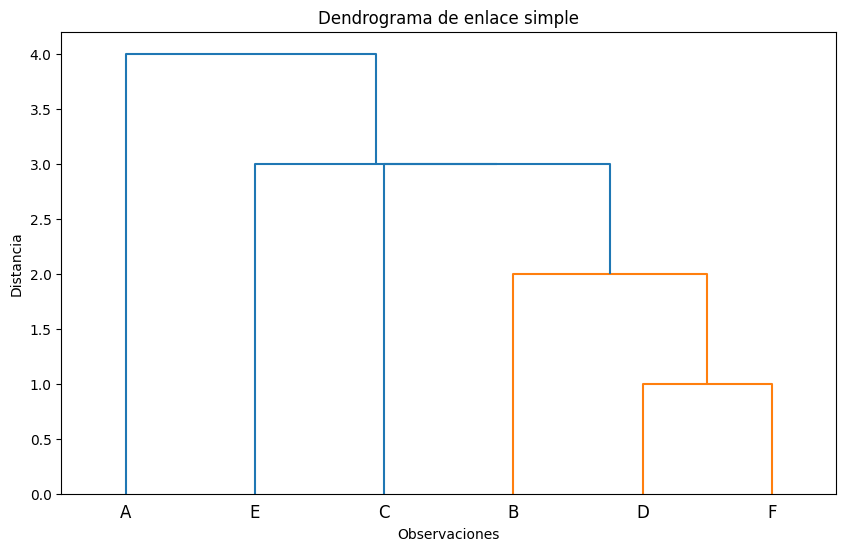

In [ ]:
# Hacer el dendograma con seaborn y scipy
# Convertir la matriz de distancias a un formato adecuado para linkage
from scipy.spatial.distance import squareform
dist_condensed = squareform(distancias)
Z = linkage(dist_condensed, method='single')

# Crear el dendrograma
plt.figure(figsize=(10, 6))
dendrogram(Z, labels=[chr(i + 65) for i in range(distancias.shape[0])])
plt.title("Dendrograma de enlace simple")
plt.xlabel("Observaciones")
plt.ylabel("Distancia")
plt.show()